# Sirocco API Examples - Python

In this jupyter notebook we will learn how to work with the main functionalities provided by the Sirocco Energy API for Nationales.

We will follow the same structure that can be found in the API documentation. 

Any feedback or request is welcome :)

In [1]:
from sirocco_api import (
    display_json_pretty,
    get_current_utc_datetime,
    get_available_timezones,
    get_my_projects,
    get_forecasts_info,
    get_selected_forecast,
    get_backtests_info,
    get_selected_backtests,
    get_all_projects,
    get_real_data
)

import os
import pandas as pd

In [2]:
current_date = get_current_utc_datetime()
print("Current date (UTC):", current_date)

Current date (UTC): 2024/04/16 08:05:21


In [3]:
# Get environment var SIROCCO_API
if os.getenv("SIROCCO_API") is None:
    raise ValueError("Environment variable SIROCCO_API is not set.")

## Get available timezones

In [4]:
all_tzs = get_available_timezones()

In [5]:
# This is just to pretty print the JSON
# display_json_pretty(all_tzs)

```python
{'control': 'Success',
 'timezones': ['Africa/Abidjan',
               'Africa/Accra',
               'Africa/Addis_Ababa',
               'Africa/Algiers',
               'Africa/Asmara',
               'Africa/Asmera',
               'Africa/Bamako',
               'Africa/Bangui',
               'Africa/Banjul',
               'Africa/Bissau',
               'Africa/Blantyre',
               ....]
}
```

## Get my projects

With the following function, we get all the projects associated with our token.

In [6]:
my_projects = get_my_projects()
display_json_pretty(my_projects)

{'control': 'Success',
 'runs': [{'id': 10, 'name': 'Ireland with curtailments'},
          {'id': 11, 'name': 'Portugal'},
          {'id': 12, 'name': 'Spain'},
          {'id': 15, 'name': 'Romania onshore'},
          {'id': 16, 'name': 'Ireland available'},
          {'id': 17, 'name': 'Spain'},
          {'id': 18, 'name': 'Greece'},
          {'id': 19, 'name': 'France onshore'},
          {'id': 20, 'name': 'France offshore'},
          {'id': 21, 'name': 'Great Britain'}]}


In [7]:
# we can also use the parameter `return_id_project=True` to get a dict with the project id as key
my_projects = get_my_projects(return_id_project=True)
display_json_pretty(my_projects)

{10: 'Ireland with curtailments',
 11: 'Portugal',
 12: 'Spain',
 15: 'Romania onshore',
 16: 'Ireland available',
 17: 'Spain',
 18: 'Greece',
 19: 'France onshore',
 20: 'France offshore',
 21: 'Great Britain'}


# Get all projects available

With this function, we will get all the projects available by `Sirocco-Energy`

In [8]:
all_projects = get_all_projects()

In [9]:
pd.DataFrame(all_projects['runs'])

,id,name,nominal,var,added
0,10,Ireland with curtailments,4600,onshore,1
1,11,Portugal,5500,onshore,1
2,12,Spain,30108,onshore,1
3,15,Romania onshore,3000,onshore,1
4,16,Ireland available,5000,onshore,1
5,18,Greece,5065,onshore,1
6,19,France onshore,22134,onshore,1
7,21,Great Britain,23000,onshore,1


## Get forecasts info

We begin the predictions section. First of all, we may be interested in obtaining information about a certain project. 

With the following function, `get_forecasts_info` we will be able to know from when we have forecasts available.


In [10]:
fcast_info = get_forecasts_info(10, timezone="UTC")
display_json_pretty(fcast_info)

{'control': 'Success',
 'forecast': [{'end': '2024-04-25 06:00:00', 'start': '2023-04-16 03:00:00'}]}


We now know that for run 10, which corresponds to the `Ireland project with curltainments`, we can get information from '2023-08-01' to the present day.

> **NOTE:** These figures may change over time, as we want to store up to 1 year past all the projects we have underway. Please be patient. If you need something specific that you cannot access via API, please do not hesitate to contact us.

# Get selected forecast

We can now get the forecast for a specific project. We will use the `get_selected_forecast` function to get the forecast for the `Ireland project with curltainments` at the same time we see all the functionality this function provides.

In [11]:
# if you don't specify the timezone, it will default to UTC
# if you don´t specify init_date and end_date, it will default provide the latest available forecast
last_available_forecast = get_selected_forecast(10)


In [12]:
# display_json_pretty(last_available_forecast)

```python 

{'control': 'Success',
 'forecast': [{'ahead': 600,
               'date': '2024-03-10 10:00:00',
               'power': 1264.38,
               'power_010': 724.652,
               'power_025': 904.542,
               'power_075': 1555.34,
               'power_090': 1713.45,
               'run': 10,
               'start': '2024-03-10 00:00:00'},
              {'ahead': 660,
               'date': '2024-03-10 11:00:00',
               'power': 1245.59,
               'power_010': 741.694,
               'power_025': 932.841,
               'power_075': 1614.31,
               'power_090': 1777.8,
               'run': 10,
               'start': '2024-03-10 00:00:00'},
               ....
               ]
}

```

Look how easy it is to get the forecast for the `Ireland project with curltainments` for the next 7 days.

In [13]:
pd.DataFrame(last_available_forecast["forecast"])

,run,start,date,ahead,power,power_010,power_025,power_075,power_090
0,10,2024-04-16 00:00:00,2024-04-16 08:00:00,480,2365.140,1210.100,1517.990,2638.69,2902.28
1,10,2024-04-16 00:00:00,2024-04-16 09:00:00,540,2350.910,1267.820,1586.750,2743.79,3024.31
2,10,2024-04-16 00:00:00,2024-04-16 10:00:00,600,2373.370,1266.800,1600.460,2842.35,3128.47
3,10,2024-04-16 00:00:00,2024-04-16 11:00:00,660,2448.310,1319.310,1663.850,2925.99,3198.60
4,10,2024-04-16 00:00:00,2024-04-16 12:00:00,720,2392.800,1300.120,1638.460,2910.31,3200.55
...,...,...,...,...,...,...,...,...,...
164,10,2024-04-15 12:00:00,2024-04-23 04:00:00,11040,926.947,191.653,304.397,1004.94,1269.33
165,10,2024-04-15 12:00:00,2024-04-23 05:00:00,11100,974.332,201.461,319.724,1069.67,1352.96
166,10,2024-04-15 12:00:00,2024-04-23 06:00:00,11160,1012.370,209.834,333.048,1123.20,1421.93
167,10,2024-04-15 12:00:00,2024-04-23 07:00:00,11220,1037.250,216.068,343.279,1159.98,1469.25


Let's make a simple graph to show what we have in data.

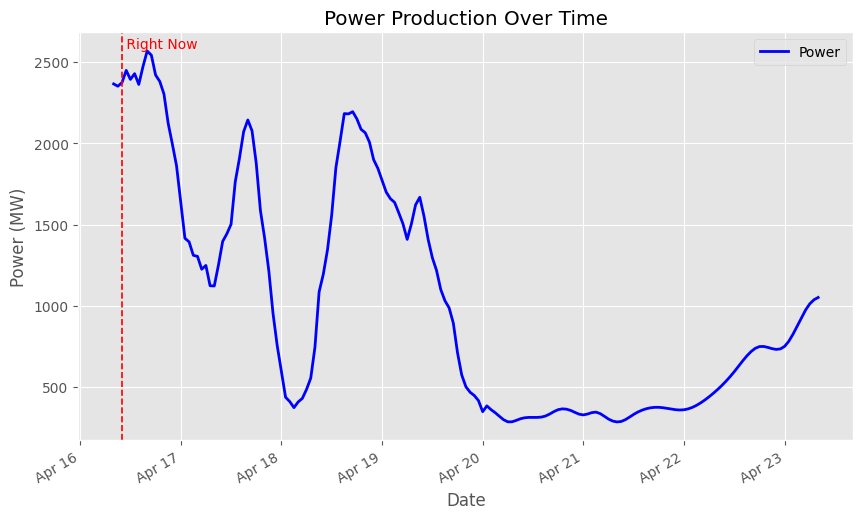

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


def plot_power(df, size=(10, 6)):
    """
    This function takes a DataFrame with a 'date' column and a 'power' column,
    and then plots 'power' over time, highlighting the current date with a vertical line
    and text.
    """
    # Ensure 'date' is of datetime type
    df["date"] = pd.to_datetime(df["date"])

    # Sort DataFrame by date
    df = df.sort_values("date")

    # Set to use 'ggplot' style for the plot
    plt.style.use("ggplot")

    # Create a figure and axis with the specified size
    if size:
        fig, ax = plt.subplots(figsize=size)
    else:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Plot 'power' along 'date'
    ax.plot(df["date"], df["power"], label="Power", color="blue", linewidth=2)

    # Additional configuration for formatting the X axis
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    plt.gcf().autofmt_xdate()  # Rotate dates for better display

    # Draw vertical line on the current date
    today = datetime.now()
    plt.axvline(x=today, color="red", linestyle="--", linewidth=1.2)

    # Add text to indicate the current date
    plt.text(today, max(df["power"]), " Right Now", color="red", ha="left", va="bottom")

    # Add title and axis labels
    plt.title("Power Production Over Time")
    plt.xlabel("Date")
    plt.ylabel("Power (MW)")

    # Show legend
    plt.legend()

    # Show plot
    plt.show()


# Assuming there is a DataFrame 'df' with the appropriate columns
# To use the function, call plot_power(df) passing the DataFrame as an argument.
plot_power(pd.DataFrame(last_available_forecast["forecast"]))

So far so good. We have the forecast for the next 7 days with an hourly resolution. 

Let´s see what happens when we add `init_date` and `end_date` parameters to the function.

In [15]:
# if you don't specify the timezone, it will default to UTC
selected_forecasts_w_date = get_selected_forecast(10, init_date="2024-02-15")

In [16]:
# display_json_pretty(selected_forecasts_w_date)

```python

{'control': 'Success',
 'forecast': [{'ahead': 0,
               'date': '2024-02-15 00:00:00',
               'power': 2109.08,
               'power_010': 1838.77,
               'power_025': 1954.17,
               'power_075': 2343.96,
               'power_090': 2459.7,
               'run': 10,
               'start': '2024-02-15 00:00:00'},
              {'ahead': 60,
               'date': '2024-02-15 01:00:00',
               'power': 1916.17,
               'power_010': 1637.49,
               'power_025': 1751.66,
               'power_075': 2137.95,
               'power_090': 2253.86,
               'run': 10,
               'start': '2024-02-15 00:00:00'},
                ....
                ]
}
    
```

## `The Line` Plot

What you see below is what we call "the line".

The line is the concatenation of the latest forecasts with the minimum ahead distance between each other. 

That is, if we are receiving 4 forecasts a day spaced every 6 hours, the line will draw the first 6 hours of each forecast.

This plot is not very useful in terms of forecasting, so it is not recommended to use it for that purpose. However, it is very useful to see the evolution of the forecasts and to detect possible errors in the data.

Let´s see how to get specific data that is better for evaluating the forecast.

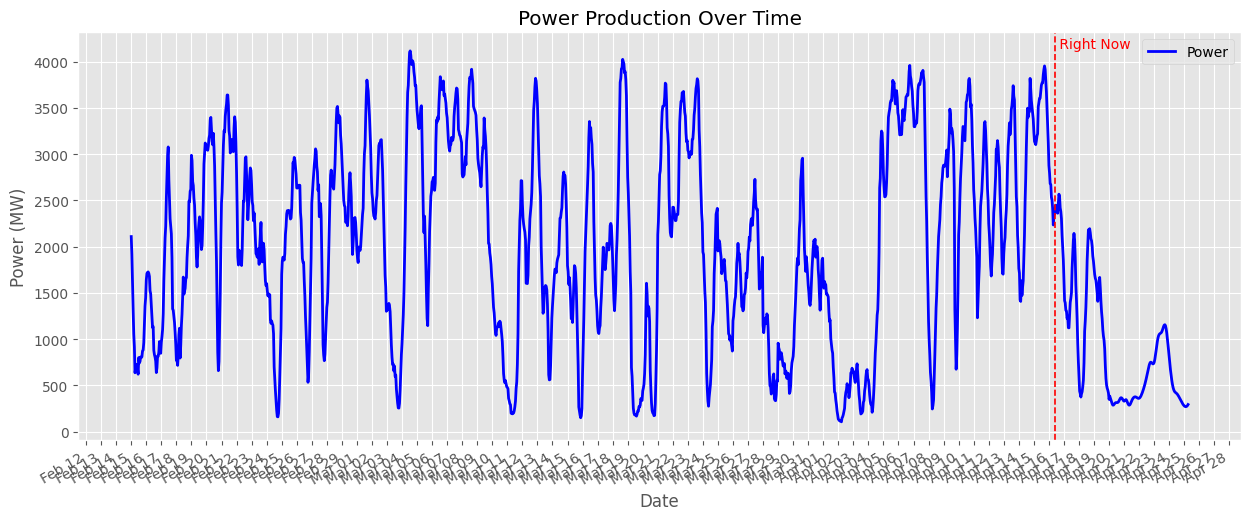

In [17]:
plot_power(pd.DataFrame(selected_forecasts_w_date["forecast"]), size=(15, 6))

## Data for evaluation: Backtest Data

We call `Backtest` to how the model would have behaved if it had been running in the past.

Once we have implemented the project, we will prepare up to 1 year of historical data on how the model would have performed.

Some projects may have more history than others, as we are still in the testing phase, but all will soon be complete. 🚧🚧

Our aim in this section is that a quick but fair assessment of the model can be made. 

When we first prepare a new project, we generate a backtest using a single pass, the 00's. But as time goes by and we provide 4 forecasts in realtime, those 4 forecasts complete the backtest until, in the future, we can have all 4 forecasts for a year in the past.

For now we only keep 3 days ahead to the past, although in production we are giving up to 7 days ahead.

Let´s get the backtest info for project 21. We will use the `get_backtest_info` function to get the backtest info for the `Great Britain`.

Here, we will get all the available forecasts.


In [18]:
backtest_21_info = get_backtests_info(21, timezone="UTC")


In [19]:
# display_json_pretty(backtest_21_info)

```python

{'control': 'Success',
 'forecasts': [{'end_ahead': 4260,
                'end_date': '2024-03-12 23:00:00',
                'init_ahead': 0,
                'init_date': '2024-03-10 00:00:00',
                'run': 21,
                'start_forecast': '2024-03-10 00:00:00'},
               {'end_ahead': 4260,
                'end_date': '2024-03-12 17:00:00',
                'init_ahead': 0,
                'init_date': '2024-03-09 18:00:00',
                'run': 21,
                'start_forecast': '2024-03-09 18:00:00'},
               {'end_ahead': 4260,
                'end_date': '2024-03-12 11:00:00',
                'init_ahead': 0,
                'init_date': '2024-03-09 12:00:00',
                'run': 21,
                'start_forecast': '2024-03-09 12:00:00'},
                ....
                ]
}
    
```


In [20]:
current_date = get_current_utc_datetime()
print("Current date (UTC):", current_date)

Current date (UTC): 2024/04/16 08:05:26


In [21]:
# Since we have 1 year of backtest, oldest registers are starting to be deleted
pd.DataFrame(backtest_21_info["forecasts"]).sort_values(
    "start_forecast", ascending=True
).reset_index(drop=True)

,run,start_forecast,init_date,end_date,init_ahead,end_ahead
0,21,2023-04-14 00:00:00,2023-04-16 03:00:00,2023-04-16 23:00:00,3060,4260
1,21,2023-04-15 00:00:00,2023-04-16 03:00:00,2023-04-17 23:00:00,1620,4260
2,21,2023-04-16 00:00:00,2023-04-16 03:00:00,2023-04-18 23:00:00,180,4260
3,21,2023-04-17 00:00:00,2023-04-17 00:00:00,2023-04-19 23:00:00,0,4260
4,21,2023-04-18 00:00:00,2023-04-18 00:00:00,2023-04-20 23:00:00,0,4260
...,...,...,...,...,...,...
474,21,2024-04-14 18:00:00,2024-04-14 18:00:00,2024-04-17 17:00:00,0,4260
475,21,2024-04-15 00:00:00,2024-04-15 00:00:00,2024-04-17 23:00:00,0,4260
476,21,2024-04-15 06:00:00,2024-04-15 06:00:00,2024-04-18 05:00:00,0,4260
477,21,2024-04-15 12:00:00,2024-04-15 12:00:00,2024-04-18 11:00:00,0,4260


# Get backtest data

Let´s get the backtest data for the `Great Britain` project. For example, from 2024-01-01. 

Since we could be intered in see the backtest for the day ahead, let´s filter data using `get_selected_backtest` function for ahead 1440 - 2880 minutes.

In [22]:
backtest_21_forecast = get_selected_backtests(21,
                                              init_date="2024-03-01",
                                              init_ahead=1440, # 24 hours
                                              end_ahead=2880, # 48 hours
                                              )

In [23]:
# display_json_pretty(backtest_21_forecast)

```python

{'control': 'Success',
 'forecasts': [{'ahead': 1440,
                'date': '2024-01-02 00:00:00',
                'power': 16439.6,
                'power_010': 8837,
                'power_025': 11019.6,
                'power_075': 18270.7,
                'power_090': 19989.9,
                'run': 21,
                'start': '2024-01-01 00:00:00'},
               {'ahead': 1500,
                'date': '2024-01-02 01:00:00',
                'power': 16470.8,
                'power_010': 9015.51,
                'power_025': 11250.1,
                'power_075': 18694.8,
                'power_090': 20384.5,
                'run': 21,
                'start': '2024-01-01 00:00:00'},
                ....
                ]
}

```

In [24]:
data = pd.DataFrame(backtest_21_forecast['forecasts'])
data

,run,start,date,ahead,power,power_010,power_025,power_075,power_090
0,21,2024-03-06 06:00:00,2024-03-07 06:00:00,1440,7657.73,4291.98,5350.46,8649.85,9498.80
1,21,2024-03-06 06:00:00,2024-03-07 07:00:00,1500,8310.90,4103.48,5362.64,9106.38,9994.47
2,21,2024-03-06 06:00:00,2024-03-07 08:00:00,1560,8628.11,4320.92,5639.56,9460.91,10642.10
3,21,2024-03-06 06:00:00,2024-03-07 09:00:00,1620,9026.72,4733.50,6050.99,10124.40,11035.30
4,21,2024-03-06 06:00:00,2024-03-07 10:00:00,1680,10028.50,5351.33,6831.52,11512.60,12435.20
...,...,...,...,...,...,...,...,...,...
3995,21,2024-04-15 18:00:00,2024-04-17 14:00:00,2640,8917.57,5097.37,6690.05,10739.80,11596.80
3996,21,2024-04-15 18:00:00,2024-04-17 15:00:00,2700,8685.82,4638.91,6161.48,10338.70,11087.50
3997,21,2024-04-15 18:00:00,2024-04-17 16:00:00,2760,7515.14,4384.04,5770.65,9672.02,10449.00
3998,21,2024-04-15 18:00:00,2024-04-17 17:00:00,2820,7639.19,4132.11,5404.49,9068.98,9768.30


Since the project is already in production, we will get the ahead forecast for all the available forecasts.

In [25]:
data['date'] = pd.to_datetime(data['date'])
data['start'] = pd.to_datetime(data['start'])

data['start'].dt.hour.unique()

array([ 6, 12, 18,  0])

But, we might be interested in getting the backtest for a specific pass, like the 00's. Let´s see how to do it.

In [26]:
# filter data to only include forecasts that start at 00:00 
data = data[data['start'].dt.hour == 0]

In [27]:
data

,run,start,date,ahead,power,power_010,power_025,power_075,power_090
64,21,2024-03-08,2024-03-09 00:00:00,1440,16060.9,9257.97,11686.40,19632.2,20994.1
68,21,2024-03-08,2024-03-09 01:00:00,1500,15432.5,8477.33,11060.00,19436.5,21097.5
72,21,2024-03-08,2024-03-09 02:00:00,1560,15294.1,8441.68,11025.20,19215.0,20839.2
76,21,2024-03-08,2024-03-09 03:00:00,1620,15317.1,8401.93,11007.10,19277.4,20893.8
80,21,2024-03-08,2024-03-09 04:00:00,1680,15394.1,8387.27,10998.70,19506.9,21126.0
...,...,...,...,...,...,...,...,...,...
3944,21,2024-04-15,2024-04-16 20:00:00,2640,11865.7,5476.30,7241.52,12959.8,13973.4
3948,21,2024-04-15,2024-04-16 21:00:00,2700,10892.3,4881.93,6439.84,12338.7,13358.1
3952,21,2024-04-15,2024-04-16 22:00:00,2760,10389.4,4799.24,6324.19,11684.1,12562.2
3956,21,2024-04-15,2024-04-16 23:00:00,2820,10229.2,4914.80,6497.46,11438.0,12323.1


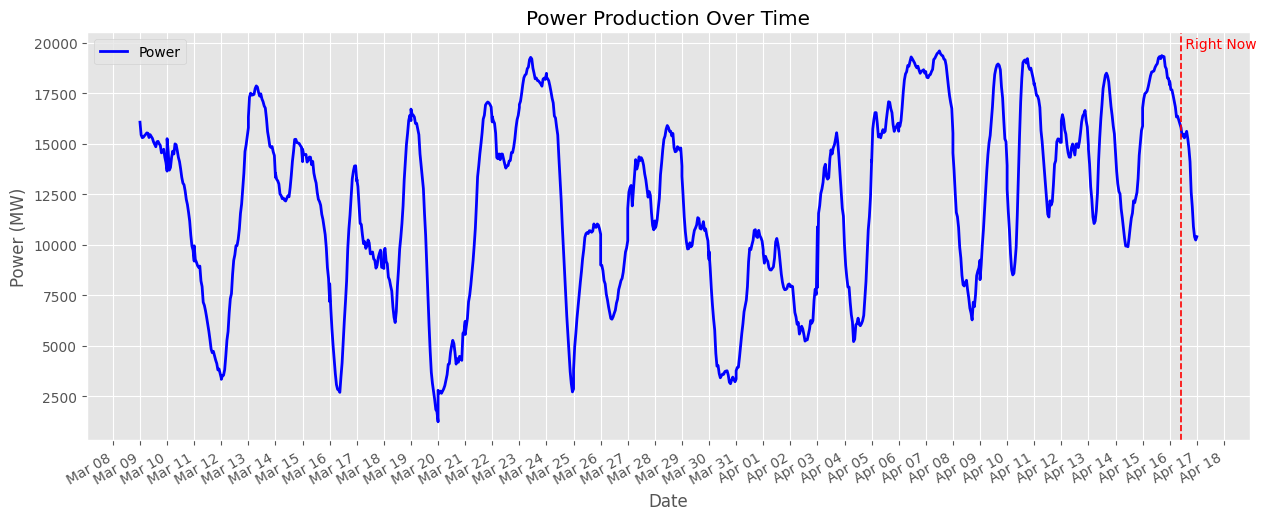

In [28]:
# the gap of few days you can see is the gap between project creation and projet in production.
# we will fix this soon.
plot_power(pd.DataFrame(data), size=(15, 6))

# Get observations data from projects

You can get data between two dates for a specific project.

In [29]:
obs = get_real_data(10, init_date="2024-03-01", end_date="2024-03-02", timezone="UTC")

In [30]:
pd.DataFrame(obs['forecasts'])

,run,date,power
0,10,2024-03-01 00:00:00,2086
1,10,2024-03-01 01:00:00,2099
2,10,2024-03-01 02:00:00,1860
3,10,2024-03-01 03:00:00,1837
4,10,2024-03-01 04:00:00,1741
5,10,2024-03-01 05:00:00,1810
6,10,2024-03-01 06:00:00,1856
7,10,2024-03-01 07:00:00,2000
8,10,2024-03-01 08:00:00,2209
9,10,2024-03-01 09:00:00,2323


Or you can get the data from a certain date to the present day.

In [31]:
obs = get_real_data(10, init_date="2024-03-01")

pd.DataFrame(obs['forecasts'])

,run,date,power
0,10,2024-03-01 00:00:00,2086
1,10,2024-03-01 01:00:00,2099
2,10,2024-03-01 02:00:00,1860
3,10,2024-03-01 03:00:00,1837
4,10,2024-03-01 04:00:00,1741
...,...,...,...
1101,10,2024-04-15 21:00:00,3285
1102,10,2024-04-15 22:00:00,2580
1103,10,2024-04-15 23:00:00,2504
1104,10,2024-04-16 00:00:00,2409
